## Arrival and Departure Distributions

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as st

In [2]:
flights_cleaned = pd.read_csv('/Users/vickichen/Desktop/flight/midterm-project/data/flights_cleaned_with_delays.csv')

In [3]:
flights_cleaned

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-05-31,WN,WN,2081,BUR,"Burbank, CA",SFO,"San Francisco, CA",1100,1138,...,80,93.0,68.0,1,326,0.0,0.0,51.0,0.0,0.0
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303,...,153,126.0,101.0,1,801,0.0,0.0,0.0,0.0,0.0
2,2019-02-13,WN,WN,1731,MSY,"New Orleans, LA",HOU,"Houston, TX",2130,2159,...,75,64.0,55.0,1,302,0.0,0.0,0.0,0.0,18.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833,...,128,142.0,102.0,1,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353,...,98,70.0,51.0,1,228,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196188,2018-01-10,DL,EV,5584,MLI,"Moline, IL",ATL,"Atlanta, GA",1735,1726,...,115,119.0,91.0,1,633,0.0,0.0,0.0,0.0,0.0
196189,2018-07-25,AA,AA,2807,TPA,"Tampa, FL",MIA,"Miami, FL",1535,1602,...,71,156.0,54.0,1,204,10.0,0.0,85.0,0.0,17.0
196190,2019-11-19,UA,YX,3419,EWR,"Newark, NJ",DTW,"Detroit, MI",845,836,...,137,123.0,80.0,1,488,0.0,0.0,0.0,0.0,0.0
196191,2018-08-29,AS,AS,1323,SFO,"San Francisco, CA",PDX,"Portland, OR",810,807,...,101,124.0,79.0,1,550,0.0,0.0,20.0,0.0,0.0


In [4]:
flights_cleaned.describe()

,op_carrier_fl_num,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000,196111.000000,196193.0,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000,196193.000000
mean,2726.946063,1328.214080,1334.102098,10.589511,17.520279,7.681156,1483.543760,1463.172809,5.626179,138.040858,133.080640,107.910005,1.0,770.031229,4.071302,0.736051,3.142141,0.015031,5.181836
std,1863.286300,489.647342,503.453560,48.962303,10.023727,6.156571,516.379757,536.787292,51.197635,71.590080,71.436447,69.510928,0.0,585.822429,31.326501,14.686442,17.877354,0.892776,24.711415
min,1.000000,1.000000,1.000000,-41.000000,0.000000,0.000000,1.000000,1.000000,-78.000000,20.000000,16.000000,8.000000,1.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1118.000000,915.000000,917.000000,-6.000000,11.000000,4.000000,1100.000000,1048.000000,-15.000000,87.000000,82.000000,58.000000,1.0,342.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2307.000000,1320.000000,1326.000000,-2.000000,15.000000,6.000000,1511.000000,1503.000000,-6.000000,119.000000,115.000000,89.000000,1.0,605.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4317.000000,1733.000000,1743.000000,6.000000,20.000000,9.000000,1915.000000,1913.000000,8.000000,168.000000,163.000000,137.000000,1.0,1005.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9390.000000,2359.000000,2400.000000,1522.000000,172.000000,208.000000,2400.000000,2400.000000,1515.000000,703.000000,704.000000,669.000000,1.0,5095.000000,1500.000000,1280.000000,1186.000000,139.000000,1189.000000


## Arrival Delay WITH outliners distribution

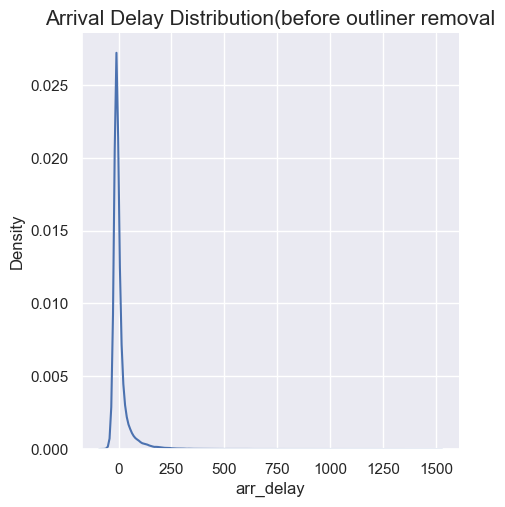

In [5]:
sns.set_theme(style="darkgrid")
sns.displot(flights_cleaned, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution(before outliner removal", size=15)
plt.show()

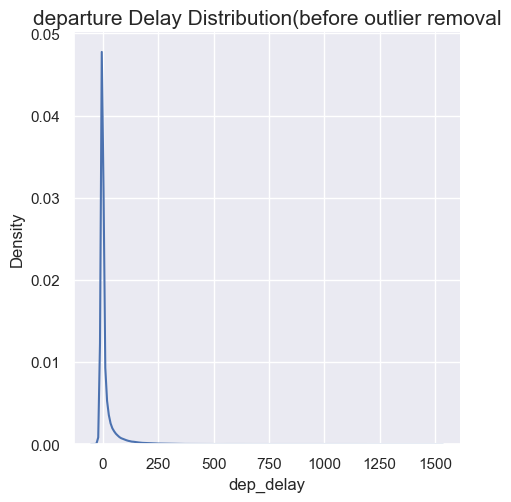

In [6]:
#departure delay
sns.set_theme(style="darkgrid")
sns.displot(flights_cleaned, x="dep_delay",kind='kde')
plt.title("departure Delay Distribution(before outlier removal", size=15)
plt.show()

### Removing arry_delay outlier Using 1.5IQR RULE 

In [7]:

Q1_arrival = flights_cleaned.arr_delay.quantile(0.25)
Q3_arrival = flights_cleaned.arr_delay.quantile(0.75)
IQR= Q3_arrival - Q1_arrival
flights_withirq = flights_cleaned.loc[(flights_cleaned['arr_delay'] >= (Q1_arrival - 1.5*IQR))\
                                     & (flights_cleaned['arr_delay'] <= Q3_arrival + 1.5*IQR)]

In [8]:
flights_withirq

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303,...,153,126.0,101.0,1,801,0.0,0.0,0.0,0.0,0.0
2,2019-02-13,WN,WN,1731,MSY,"New Orleans, LA",HOU,"Houston, TX",2130,2159,...,75,64.0,55.0,1,302,0.0,0.0,0.0,0.0,18.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833,...,128,142.0,102.0,1,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353,...,98,70.0,51.0,1,228,0.0,0.0,0.0,0.0,0.0
5,2018-10-30,DL,OO,3807,SLC,"Salt Lake City, UT",SMF,"Sacramento, CA",1535,1533,...,112,107.0,81.0,1,532,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196187,2019-06-25,DL,OO,4931,LAS,"Las Vegas, NV",SNA,"Santa Ana, CA",1730,1730,...,70,70.0,44.0,1,226,0.0,0.0,0.0,0.0,0.0
196188,2018-01-10,DL,EV,5584,MLI,"Moline, IL",ATL,"Atlanta, GA",1735,1726,...,115,119.0,91.0,1,633,0.0,0.0,0.0,0.0,0.0
196190,2019-11-19,UA,YX,3419,EWR,"Newark, NJ",DTW,"Detroit, MI",845,836,...,137,123.0,80.0,1,488,0.0,0.0,0.0,0.0,0.0
196191,2018-08-29,AS,AS,1323,SFO,"San Francisco, CA",PDX,"Portland, OR",810,807,...,101,124.0,79.0,1,550,0.0,0.0,20.0,0.0,0.0


In [9]:
flights_withirq.describe()

,op_carrier_fl_num,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000,177834.000000,177910.0,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000,177910.000000
mean,2713.572599,1311.054679,1308.028273,0.497398,16.830909,7.514777,1467.510039,1455.995329,-5.411540,137.772497,131.866893,107.552560,1.0,769.410280,0.788438,0.058215,1.065376,0.005581,0.913074
std,1859.785091,490.267432,495.535210,11.761935,8.269694,5.518334,513.887346,517.203788,15.314401,71.536688,70.942494,69.383165,0.0,585.957916,4.119109,1.139999,4.821299,0.340043,4.615418
min,1.000000,1.000000,1.000000,-41.000000,0.000000,0.000000,1.000000,1.000000,-49.000000,20.000000,16.000000,8.000000,1.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1111.000000,900.000000,859.000000,-6.000000,11.000000,4.000000,1050.000000,1043.000000,-16.000000,86.000000,81.000000,57.000000,1.0,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2294.000000,1300.000000,1301.000000,-3.000000,15.000000,6.000000,1454.000000,1448.000000,-8.000000,119.000000,113.000000,89.000000,1.0,604.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4281.000000,1722.000000,1724.000000,2.000000,20.000000,9.000000,1905.000000,1900.000000,2.000000,168.000000,162.000000,136.000000,1.0,1005.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9390.000000,2359.000000,2400.000000,204.000000,100.000000,77.000000,2400.000000,2400.000000,42.000000,703.000000,704.000000,669.000000,1.0,5095.000000,42.000000,42.000000,42.000000,39.000000,42.000000


## Arrival Delay Distribution without outliers

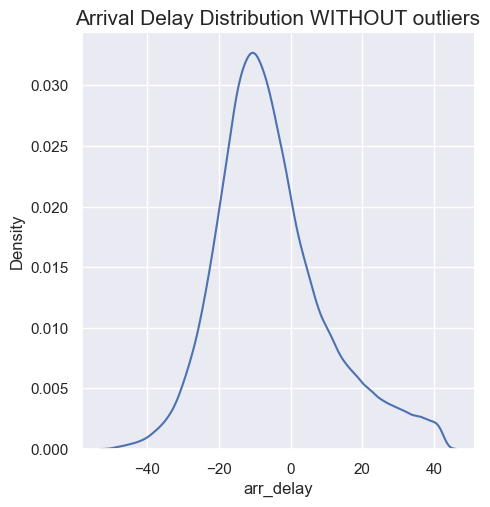

In [10]:
sns.set_theme(style="darkgrid")
sns.displot(flights_withirq, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution WITHOUT outliers", size=15)
plt.show()

### Removing dep_delay outlier Using 1.5IQR RULE 

In [11]:
Q1_dep = flights_cleaned.dep_delay.quantile(0.25)
Q3_dep = flights_cleaned.dep_delay.quantile(0.75)
IQR= Q3_dep - Q1_dep
flights_withirq = flights_cleaned.loc[(flights_cleaned['dep_delay'] >= (Q1_dep - 1.5*IQR))\
                                     & (flights_cleaned['dep_delay'] <= Q3_dep + 1.5*IQR)]

In [12]:
flights_withirq

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303,...,153,126.0,101.0,1,801,0.0,0.0,0.0,0.0,0.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833,...,128,142.0,102.0,1,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353,...,98,70.0,51.0,1,228,0.0,0.0,0.0,0.0,0.0
5,2018-10-30,DL,OO,3807,SLC,"Salt Lake City, UT",SMF,"Sacramento, CA",1535,1533,...,112,107.0,81.0,1,532,0.0,0.0,0.0,0.0,0.0
6,2018-03-31,DL,DL,2530,CLE,"Cleveland, OH",ATL,"Atlanta, GA",715,713,...,110,115.0,83.0,1,554,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196186,2019-06-20,UA,YX,3505,IAH,"Houston, TX",SDF,"Louisville, KY",1200,1152,...,143,131.0,106.0,1,788,0.0,0.0,0.0,0.0,0.0
196187,2019-06-25,DL,OO,4931,LAS,"Las Vegas, NV",SNA,"Santa Ana, CA",1730,1730,...,70,70.0,44.0,1,226,0.0,0.0,0.0,0.0,0.0
196188,2018-01-10,DL,EV,5584,MLI,"Moline, IL",ATL,"Atlanta, GA",1735,1726,...,115,119.0,91.0,1,633,0.0,0.0,0.0,0.0,0.0
196190,2019-11-19,UA,YX,3419,EWR,"Newark, NJ",DTW,"Detroit, MI",845,836,...,137,123.0,80.0,1,488,0.0,0.0,0.0,0.0,0.0


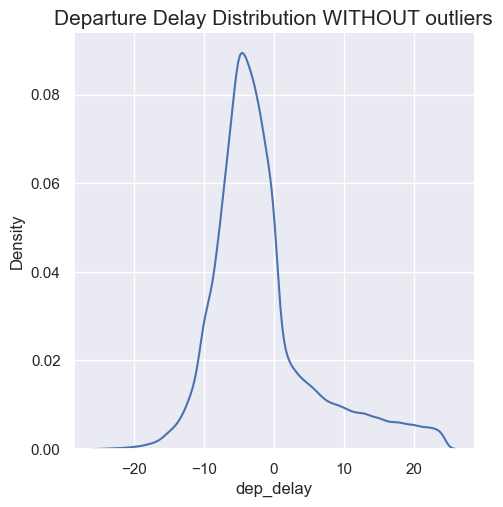

In [13]:
sns.set_theme(style="darkgrid")
sns.displot(flights_withirq, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution WITHOUT outliers", size=15)
plt.show()

In [14]:
flights_withirq.describe()

,op_carrier_fl_num,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,168925.000000,168925.000000,168925.000000,168925.000000,168925.000000,168925.000000,168925.000000,168925.000000,168925.000000,168925.000000,168925.000000,168854.000000,168925.0,168925.000000,168925.000000,168925.000000,168925.000000,168925.000000,168925.00000
mean,2717.201539,1299.510268,1293.537457,-1.686174,17.221353,7.663431,1458.637537,1448.026604,-6.818955,137.682013,132.549232,107.695329,1.0,768.538553,0.291206,0.033038,1.413402,0.002374,0.24338
std,1860.299539,489.685823,493.261089,7.444625,9.468069,6.054390,510.905856,511.869074,14.889966,71.672800,71.488958,69.654257,0.0,587.051961,2.102817,0.983208,7.008728,0.187331,1.91399
min,1.000000,1.000000,1.000000,-24.000000,0.000000,0.000000,1.000000,1.000000,-78.000000,20.000000,16.000000,9.000000,1.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1113.000000,855.000000,851.000000,-6.000000,11.000000,4.000000,1045.000000,1038.000000,-16.000000,86.000000,81.000000,58.000000,1.0,340.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2299.000000,1252.000000,1251.000000,-3.000000,15.000000,6.000000,1445.000000,1439.000000,-8.000000,119.000000,114.000000,89.000000,1.0,603.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,4286.000000,1715.000000,1713.000000,0.000000,20.000000,9.000000,1859.000000,1853.000000,0.000000,168.000000,162.000000,137.000000,1.0,1005.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9390.000000,2359.000000,2400.000000,24.000000,172.000000,208.000000,2400.000000,2400.000000,223.000000,703.000000,704.000000,669.000000,1.0,5095.000000,74.000000,210.000000,217.000000,23.000000,43.00000


In [15]:
flights_withirq.to_csv('/Users/vickichen/Desktop/flight/midterm-project/data/flights_without_outlier.csv',index=False)

In [16]:
flights_withirq

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303,...,153,126.0,101.0,1,801,0.0,0.0,0.0,0.0,0.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833,...,128,142.0,102.0,1,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353,...,98,70.0,51.0,1,228,0.0,0.0,0.0,0.0,0.0
5,2018-10-30,DL,OO,3807,SLC,"Salt Lake City, UT",SMF,"Sacramento, CA",1535,1533,...,112,107.0,81.0,1,532,0.0,0.0,0.0,0.0,0.0
6,2018-03-31,DL,DL,2530,CLE,"Cleveland, OH",ATL,"Atlanta, GA",715,713,...,110,115.0,83.0,1,554,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196186,2019-06-20,UA,YX,3505,IAH,"Houston, TX",SDF,"Louisville, KY",1200,1152,...,143,131.0,106.0,1,788,0.0,0.0,0.0,0.0,0.0
196187,2019-06-25,DL,OO,4931,LAS,"Las Vegas, NV",SNA,"Santa Ana, CA",1730,1730,...,70,70.0,44.0,1,226,0.0,0.0,0.0,0.0,0.0
196188,2018-01-10,DL,EV,5584,MLI,"Moline, IL",ATL,"Atlanta, GA",1735,1726,...,115,119.0,91.0,1,633,0.0,0.0,0.0,0.0,0.0
196190,2019-11-19,UA,YX,3419,EWR,"Newark, NJ",DTW,"Detroit, MI",845,836,...,137,123.0,80.0,1,488,0.0,0.0,0.0,0.0,0.0


In [17]:
flights_withirq.isnull().sum()

fl_date                 0
mkt_unique_carrier      0
op_unique_carrier       0
op_carrier_fl_num       0
origin                  0
origin_city_name        0
dest                    0
dest_city_name          0
crs_dep_time            0
dep_time                0
dep_delay               0
taxi_out                0
taxi_in                 0
crs_arr_time            0
arr_time                0
arr_delay               0
crs_elapsed_time        0
actual_elapsed_time     0
air_time               71
flights                 0
distance                0
carrier_delay           0
weather_delay           0
nas_delay               0
security_delay          0
late_aircraft_delay     0
dtype: int64

In [18]:
flights_withirq['arr_delay'].describe()

count    168925.000000
mean         -6.818955
std          14.889966
min         -78.000000
25%         -16.000000
50%          -8.000000
75%           0.000000
max         223.000000
Name: arr_delay, dtype: float64

#### Shapiro-Wilks Normality Test 


In [29]:
p_value= st.shapiro(flights_withirq['arr_delay'])[1]

if p_value < 0.05:
    print('Ho(Reject): Delay is not from Normal Distribution & Mean of delay is not 0.')
elif p_value > 0.05:
    print('Ha(Accept): Delay is from Normal Distribution & Mean of delay is  0.')



Ho(Reject): Delay is not from Normal Distribution & Mean of delay is not 0.
